In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from seaborn import heatmap
from statsmodels.tsa.stattools import adfuller
from mktest import mk_test
from importlib import reload

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [112]:
reload(mktest.mk_test)

NameError: name 'mktest' is not defined

In [2]:
pd.__version__

'0.22.0'

In [2]:

% matplotlib inline

In [3]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 16
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 4
rcParams['xtick.major.size'] = 8

In [4]:
mo_ticks = mdates.MonthLocator()
yr_ticks = mdates.YearLocator()


def set_ts_xaxis(ax, grid=True):
    ax.xaxis.set_major_locator(yr_ticks)
    ax.xaxis.set_minor_locator(mo_ticks)
    if grid:
        ax.grid()
    ax.xaxis.set_ticklabels(ticklabels=df.index.year.unique().tolist()+['2011'],
                        rotation=45)
    

def run_adfuller(series_values):
    result = adfuller(series_values)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, val in result[4].items():
        print(f'\t{key}: {val:.3}')
        
#def run_trend_test(trend, alpha=0.05):
    #test_trend, h, p, z

In [5]:
chl_file = './dataJar/seawifs_chl_monthly_15sosectors_repro2018.dat'
df = pd.read_csv(chl_file, delim_whitespace=True, parse_dates=[[0, 1 ,2]], index_col=0)

df.index.name=''
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1997-09-15 to 2010-12-16
Data columns (total 15 columns):
IOSTZ      155 non-null float64
IOSAZ      155 non-null float64
IOPFZ      155 non-null float64
IOAAZ      148 non-null float64
IOSAACZ    123 non-null float64
POSTZ      155 non-null float64
POSAZ      155 non-null float64
POPFZ      124 non-null float64
POAAZ      118 non-null float64
POSAACZ    99 non-null float64
AOSTZ      153 non-null float64
AOSAZ      153 non-null float64
AOPFZ      152 non-null float64
AOAAZ      139 non-null float64
AOSAAC     126 non-null float64
dtypes: float64(15)
memory usage: 19.5 KB


In [7]:
from collections import namedtuple as NT

In [10]:
Trend_Results = NT('Trend_Results', ['verdict', 'p_val', 'z_stat'])

In [ ]:
p = Trend_Results

In [101]:
df.head().T

,1997-09-15 00:00:00,1997-10-16 00:00:00,1997-11-15 00:00:00,1997-12-16 00:00:00,1998-01-16 00:00:00
IOSTZ,0.25504,0.25901,0.25415,0.25694,0.21884
IOSAZ,0.18112,0.18716,0.21564,0.22807,0.19447
IOPFZ,0.18853,0.20684,0.22538,0.25853,0.20114
IOAAZ,0.17979,0.20181,0.25342,0.35609,0.23786
IOSAACZ,0.21585,0.15529,0.15500,0.31321,0.32963
POSTZ,0.26715,0.28875,0.26712,0.24081,0.19977
POSAZ,0.17723,0.17102,0.18598,0.20120,0.15548
POPFZ,0.15366,0.14497,0.22155,0.33682,0.20036
POAAZ,0.16648,0.20121,0.33133,0.35429,0.21936
POSAACZ,0.10820,0.09423,0.22698,0.71735,0.80755


In [10]:
df.index.day.unique()

Int64Index([15, 16, 14], dtype='int64', name='')

In [11]:
df.index.day.value_counts()

16    90
15    56
14    10
Name: , dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IOSTZ,154.0,0.230624,0.026427,0.17137,0.209753,0.226380,0.249805,0.32334
IOSAZ,154.0,0.189563,0.027641,0.13570,0.169382,0.184010,0.206177,0.29009
IOPFZ,154.0,0.187936,0.042198,0.14275,0.159938,0.170055,0.199705,0.31315
IOAAZ,147.0,0.201590,0.059829,0.12526,0.161235,0.179790,0.222275,0.38888
IOSAACZ,122.0,0.245404,0.143576,0.09119,0.149998,0.186490,0.319885,0.88645
POSTZ,154.0,0.239681,0.049997,0.14145,0.204460,0.233810,0.267143,0.42006
POSAZ,154.0,0.191227,0.026511,0.15006,0.170725,0.188765,0.204613,0.28741
POPFZ,123.0,0.162097,0.045553,0.10040,0.134320,0.147710,0.171955,0.33682
POAAZ,117.0,0.227333,0.091257,0.10874,0.154130,0.201210,0.271920,0.53333
POSAACZ,98.0,0.509564,0.355061,0.08278,0.180732,0.432550,0.757450,1.47704


In [39]:
for col in df.columns:
    print(f'{col}:')
    print(df.loc[df[col].isnull(), col].index.month.value_counts())
    print(f'--------')

IOSTZ:
7    1
Name: , dtype: int64
--------
IOSAZ:
7    1
Name: , dtype: int64
--------
IOPFZ:
7    1
Name: , dtype: int64
--------
IOAAZ:
6    7
7    1
Name: , dtype: int64
--------
IOSAACZ:
7    13
6    13
5     7
Name: , dtype: int64
--------
POSTZ:
7    1
Name: , dtype: int64
--------
POSAZ:
7    1
Name: , dtype: int64
--------
POPFZ:
7    13
6    13
5     6
Name: , dtype: int64
--------
POAAZ:
7    13
6    13
5    12
Name: , dtype: int64
--------
POSAACZ:
8     13
7     13
6     13
5     12
9      4
10     2
Name: , dtype: int64
--------
AOSTZ:
7     1
10    1
9     1
Name: , dtype: int64
--------
AOSAZ:
7     1
10    1
9     1
Name: , dtype: int64
--------
AOPFZ:
7     1
6     1
10    1
9     1
Name: , dtype: int64
--------
AOAAZ:
6     13
7      2
10     1
9      1
Name: , dtype: int64
--------
AOSAAC:
7     13
6     13
5      2
10     1
9      1
Name: , dtype: int64
--------


In [48]:
df.head().T

,1997-09-15 00:00:00,1997-10-16 00:00:00,1997-11-15 00:00:00,1997-12-16 00:00:00,1998-01-16 00:00:00
IOSTZ,0.25504,0.25901,0.25415,0.25694,0.21884
IOSAZ,0.18112,0.18716,0.21564,0.22807,0.19447
IOPFZ,0.18853,0.20684,0.22538,0.25853,0.20114
IOAAZ,0.17979,0.20181,0.25342,0.35609,0.23786
IOSAACZ,0.21585,0.15529,0.15500,0.31321,0.32963
POSTZ,0.26715,0.28875,0.26712,0.24081,0.19977
POSAZ,0.17723,0.17102,0.18598,0.20120,0.15548
POPFZ,0.15366,0.14497,0.22155,0.33682,0.20036
POAAZ,0.16648,0.20121,0.33133,0.35429,0.21936
POSAACZ,0.10820,0.09423,0.22698,0.71735,0.80755


In [11]:
# FILL NaNs
df_r = df.resample('M').mean()
df_r.interpolate(inplace=True)

In [12]:
df_r.head()

,IOSTZ,IOSAZ,IOPFZ,IOAAZ,IOSAACZ,POSTZ,POSAZ,POPFZ,POAAZ,POSAACZ,AOSTZ,AOSAZ,AOPFZ,AOAAZ,AOSAAC
,,,,,,,,,,,,,,,
1997-09-30,0.25504,0.18112,0.18853,0.17979,0.21585,0.26715,0.17723,0.15366,0.16648,0.10820,0.34564,0.47131,0.19656,0.17477,0.16552
1997-10-31,0.25901,0.18716,0.20684,0.20181,0.15529,0.28875,0.17102,0.14497,0.20121,0.09423,0.33541,0.47894,0.20144,0.20470,0.16380
1997-11-30,0.25415,0.21564,0.22538,0.25342,0.15500,0.26712,0.18598,0.22155,0.33133,0.22698,0.32013,0.57954,0.24665,0.25308,0.23073
1997-12-31,0.25694,0.22807,0.25853,0.35609,0.31321,0.24081,0.20120,0.33682,0.35429,0.71735,0.29085,0.54378,0.35244,0.28682,0.69934
1998-01-31,0.21884,0.19447,0.20114,0.23786,0.32963,0.19977,0.15548,0.20036,0.21936,0.80755,0.29455,0.51265,0.35499,0.28121,0.53917


In [13]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1997-09-30 to 2010-12-31
Freq: M
Data columns (total 15 columns):
IOSTZ      160 non-null float64
IOSAZ      160 non-null float64
IOPFZ      160 non-null float64
IOAAZ      160 non-null float64
IOSAACZ    160 non-null float64
POSTZ      160 non-null float64
POSAZ      160 non-null float64
POPFZ      160 non-null float64
POAAZ      160 non-null float64
POSAACZ    160 non-null float64
AOSTZ      160 non-null float64
AOSAZ      160 non-null float64
AOPFZ      160 non-null float64
AOAAZ      160 non-null float64
AOSAAC     160 non-null float64
dtypes: float64(15)
memory usage: 20.0 KB


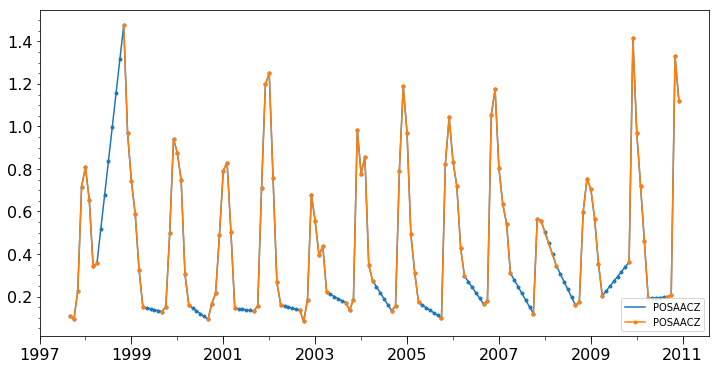

In [35]:
_, ax = pl.subplots(figsize=(12, 6))
df_r.plot(y='POSAACZ', ax=ax, marker='.')
df.plot(y='POSAACZ', ax=ax, marker='.')

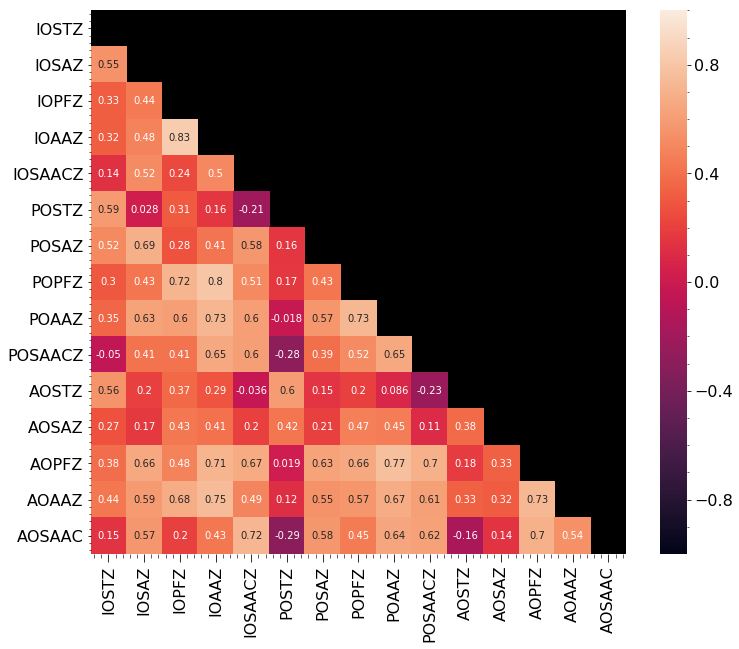

In [104]:
_, ax=pl.subplots(figsize=(12,10))
ax.set_facecolor('black')
heatmap(df.corr(), ax=ax, annot=True, vmin=-1, vmax=1,
       mask=np.triu(np.ones([df.shape[1]]*2)));

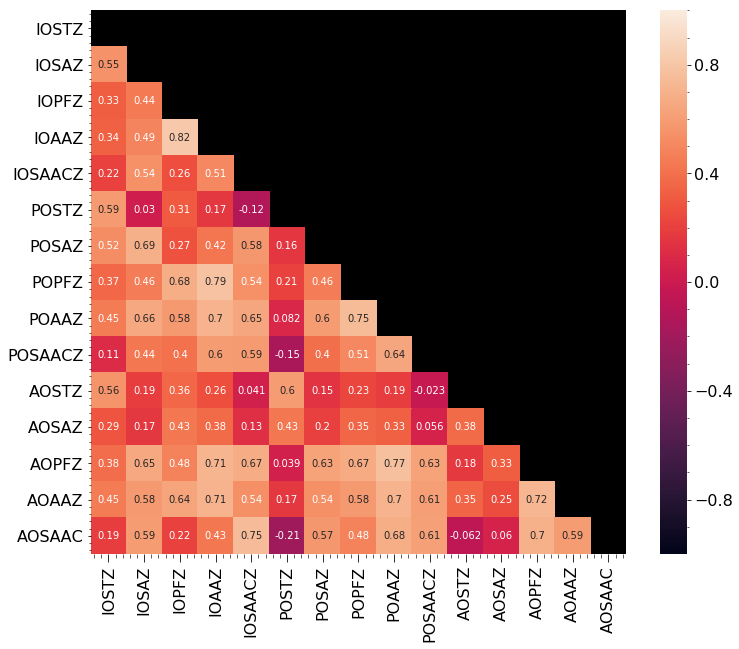

In [14]:
_, ax=pl.subplots(figsize=(12,10))
ax.set_facecolor('black')
heatmap(df_r.corr(), ax=ax, annot=True, vmin=-1, vmax=1,
       mask=np.triu(np.ones([df.shape[1]]*2)));

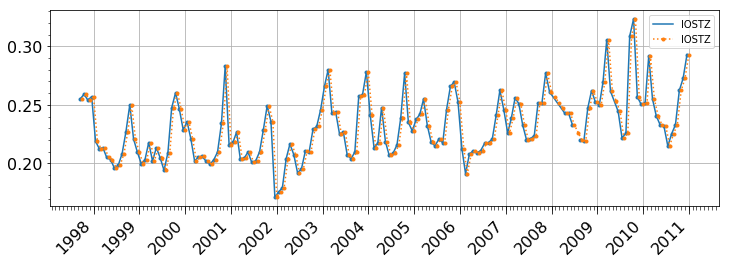

In [15]:
f, ax = pl.subplots(figsize=(12, 4))
df.plot(y='IOSTZ', ax=ax, marker='.');
df_r.plot(y='IOSTZ', ax=ax, marker='.', linestyle=':')
ax.set_xlabel('')
set_ts_xaxis(ax)

#### <u>IOSTZ_i signal decomposition</u>

In [36]:
# decompose signal with statsmodels
decomp = sm.tsa.seasonal_decompose(df.IOSTZ, model='additive', )
f, axs = pl.subplots(nrows=4, figsize=(16, 20), sharex=True)
axs[0].plot(df_r.index, decomp.observed);
axs[0].set_ylabel('')
axs[1].plot(df.index, decomp.trend);
axs[2].plot(df.index, decomp.seasonal, marker='.');
axs[3].plot(df.index, decomp.resid);
for ax in axs:
    set_ts_xaxis(ax)
f.tight_layout(h_pad=0.2)

ValueError: This function does not handle missing values

In [93]:
a,b

(0.3, 1)

In [90]:

wl2 = wl/2

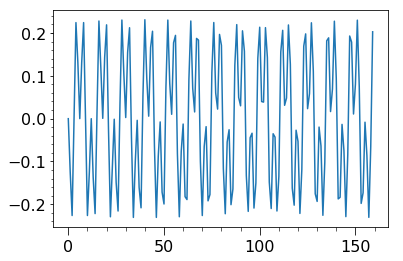

In [96]:
#t=np.arange(0,10,0.001)
t1=t-6
x=a*np.sin(t1/wl) * np.sin(t1/wl2) #+ 0.9*np.sin(4.2*t)
pl.plot(x);

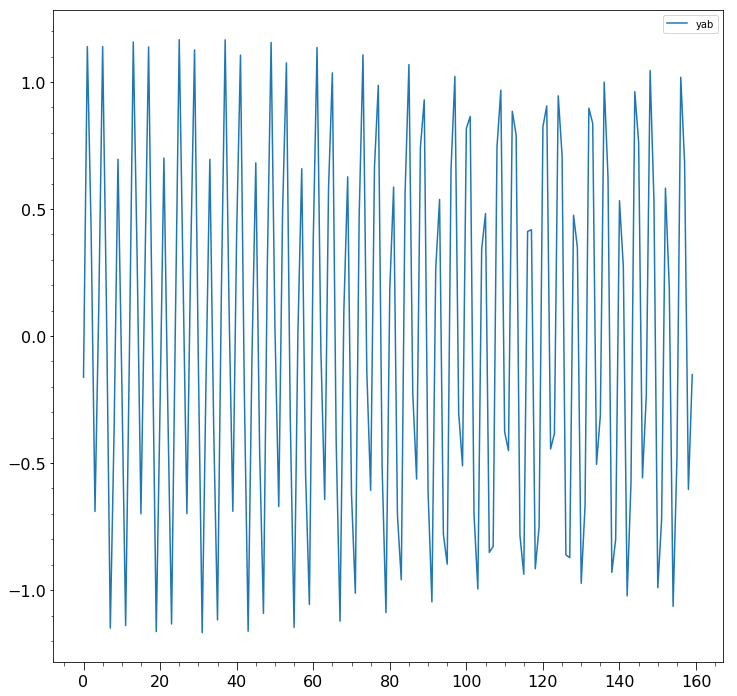

In [84]:
t = np.arange(df_r.shape[0])
wl = 1.9
thresh1 = 0
thresh2 = 20
a, b = 0.3, 1
f, ax = pl.subplots(figsize=(12, 12))
y_a = a * np.sin((t-thresh1)/wl)
y_b = b * np.sin(3*(t-thresh2)/wl)
yab = y_a + y_b
#ax.plot(y_a, label='ya');
#ax.plot(y_b, label='yb');
ax.plot(yab, label='yab')
ax.legend()

In [ ]:
decomp.

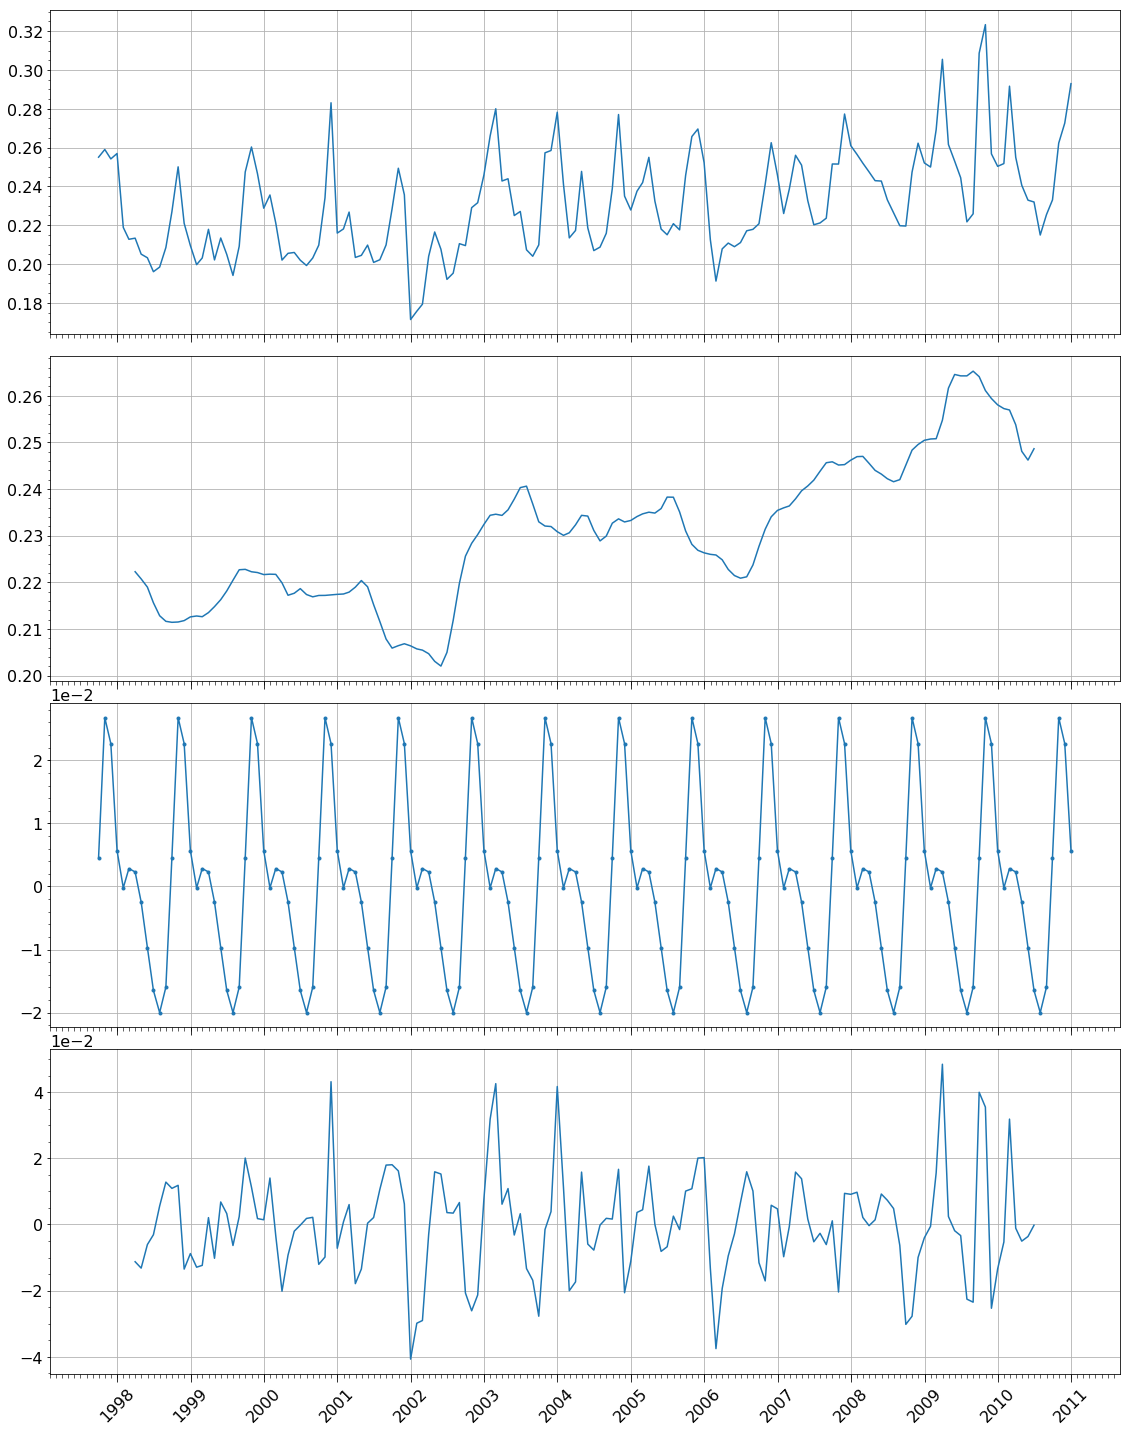

In [16]:
# decompose signal with statsmodels
decomp_iostz = sm.tsa.seasonal_decompose(df_r.IOSTZ, model='additive', )
f, axs = pl.subplots(nrows=4, figsize=(16, 20), sharex=True)
axs[0].plot(df_r.index, decomp.observed);
axs[0].set_ylabel('')
axs[1].plot(df_r.index, decomp.trend);
axs[2].plot(df_r.index, decomp.seasonal, marker='.');
axs[3].plot(df_r.index, decomp.resid);
for ax in axs:
    set_ts_xaxis(ax)
f.tight_layout(h_pad=0.2)

In [24]:
import numpy as np  
from scipy.stats import norm, mstats


def mk_tst(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    n = len(x)
    
    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
        z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)
    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [27]:
mk_tst(decomp.trend.dropna())

6984.0


('increasing', True, 0.0, 11.577252936186875)